In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [5]:
data = np.load("../Datasets/mnist_train_small.npy")

In [6]:
data.shape

(19999, 785)

In [7]:
X = data[:,1:]
y = data[:,0]

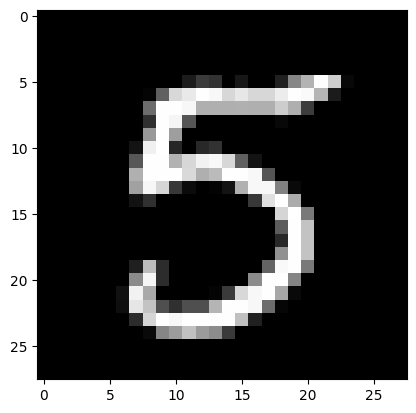

In [8]:
plt.imshow(X[0].reshape(28,28), cmap="gray")

## Note: Creating clusters manually

In [30]:
X,y = make_blobs(n_samples=1000,centers=3,random_state=42)

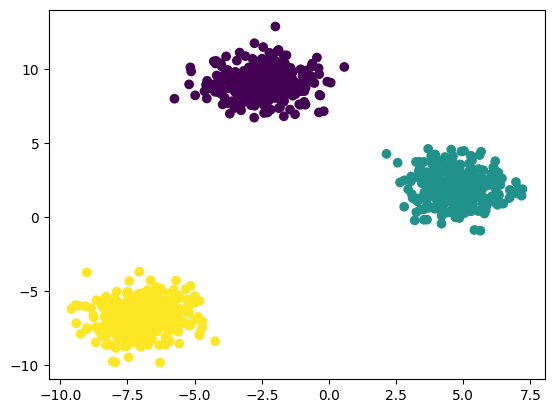

In [31]:
plt.scatter(X[:,0],X[:,1], c=y)

## Continuation from dataset

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42) 

In [10]:
X_train.shape

(13399, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model = KNeighborsClassifier()

## Training the model

In [54]:
# plotting the points on graph happens during training
# no work is happening in training knn model

In [51]:
model.fit(X_train,y_train)

KNeighborsClassifier()

## Predicting the model

In [55]:
# find distance from the new given point to all the points
# sort the distances 
# The maximum occurences of the class in the top few after sorting becomes the prediction
# Its almost brute force, lot of computation.. in real world it's not used
# if your model produces less accuracy than knn then u need to optimize the algorithm

In [52]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [53]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [56]:
model.score(X_test[:100],y_test[:100])

0.95

## Custom implementation of KNN

In [26]:
class CustomKNN:
    # constructor
    def __init__(self,n_neighbors=5):
        self.n_neighbors = n_neighbors
    
    # training
    def fit(self,X,y):
        # self._X = X.astype(np.int64)
        # if you want to choose the above line, remove the below line and also the same line that's present in predict function
        self._X = (X-X.mean())/X.std()
        self._y = y

    # predict point
    def predict_point(self,point):
        # store the distances
        list_dist = []
        for x_point,y_point in list(zip(self._X,self._y)):
            dist_point = ((point-x_point)**2).sum()
            list_dist.append([dist_point,y_point])

        # sorting the list according to the distance
        sorted_dist = sorted(list_dist)
        # top k nearest neighbors
        top_k = sorted_dist[:self.n_neighbors]
        items, count = np.unique(np.array(top_k)[:,1], return_counts=True)
        ans = items[np.argmax(count)]
        return ans
        
    #predict
    def predict(self,X):
        results = []
        X = (X-X.mean())/X.std()
        for point in X:
            results.append(self.predict_point(point))
        return np.array(results,dtype=int)

    # score to measure the accuracy
    def score(self,X,y):
        count = sum(self.predict(X)==y)
        return count/len(y)

In [21]:
m2 = CustomKNN()

In [22]:
m2.fit(X_train,y_train)

In [23]:
m2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [24]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [25]:
m2.score(X_test[:100],y_test[:100])

0.95